<div style="text-align: center; padding: 20px; border-radius: 15px; background-color: #ba3a46; color: #333333; border: 2px solid #111823; font-family: Arial, sans-serif;">
  <h1 style="font-size: 2.5em; font-weight: bold; margin: 10px 0; color: #fff;">Valorant: Machine Learning & Data Analysis</h1>
</div>

## About Dataset

Valorant is a competitive multiplayer first person shooter (FPS) in which two teams of five players compete to be the first to win 13 rounds in a game. The "ranked" game mode is where the most competitive players play to achieve the highest rank possible. There are 9 divisions in Valorant ranked. In increasing order of player skill, they are: Iron, Bronze, Silver, Gold, Platinum, Diamond, Ascendant, Immortal, and Radiant. This dataset is the first 1000 games of my ranked journey, starting in Silver (roughly the 50th percentile of all players) and peaking in Ascendant (roughly the 5th percentile)

In [1]:
#We need to update the library for better visuals
!pip install --upgrade seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


## 1. Import Librabries

In [2]:
#Importing Necessary Librabries for Data Preprocessing & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/my-first-1000-valorant-games/valorant_games.csv')

In [4]:
df.head() #Check the Data

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,4/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


In [5]:
df.describe() #Understand Data

,game_id,episode,act,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,7.500000,2.066000,10.589000,10.52700,15.299000,14.249000,4.656000,1.178400,10.308000,22.763000,134.446000,205.382000,2.990000
std,288.819436,1.102368,0.868561,3.359966,3.55273,5.253113,3.724362,2.656072,0.656784,43.383791,9.919033,35.199916,56.539958,1.368127
min,1.000000,6.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.200000,-124.000000,2.000000,42.000000,59.000000,1.000000
25%,250.750000,7.000000,1.000000,8.000000,8.00000,12.000000,13.000000,3.000000,0.800000,-20.000000,15.000000,110.000000,166.000000,2.000000
50%,500.500000,7.000000,2.000000,13.000000,13.00000,15.000000,15.000000,4.000000,1.100000,9.000000,22.000000,133.000000,203.000000,3.000000
75%,750.250000,9.000000,3.000000,13.000000,13.00000,19.000000,17.000000,6.000000,1.400000,39.000000,29.000000,157.000000,240.000000,4.000000
max,1000.000000,9.000000,3.000000,18.000000,20.00000,35.000000,26.000000,20.000000,9.700000,293.000000,63.000000,373.000000,572.000000,5.000000


In [6]:
df.info() #Understand Data Type & Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

<div style="padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
Our data has no missing values, hence we don't need to use methods like SimpleImputer to deal with the same.
</div>

In [7]:
df.isnull().sum() #Check Null Values

game_id          0
episode          0
act              0
rank             0
date             0
agent            0
map              0
outcome          0
round_wins       0
round_losses     0
kills            0
deaths           0
assists          0
kdr              0
avg_dmg_delta    0
headshot_pct     0
avg_dmg          0
acs              0
num_frag         0
dtype: int64

In [8]:
df.columns #Check All Columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag'],
      dtype='object')

## 2. Data Visualization

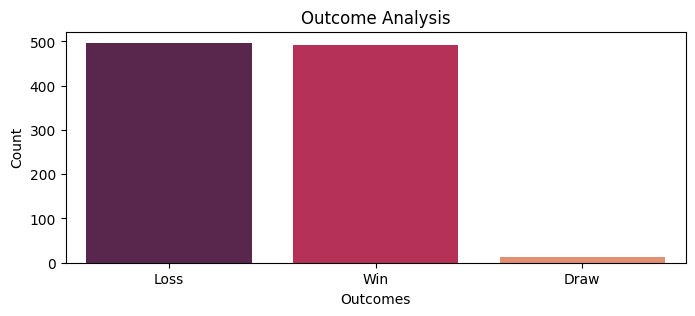

In [9]:
#Identify Win-Lose Rate
plt.figure(figsize=(8,3))
sns.countplot(data=df,x='outcome',hue='outcome',palette='rocket')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('Outcome Analysis')
plt.show()

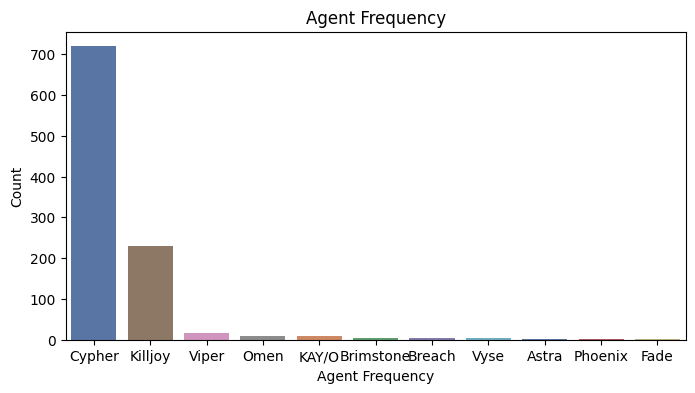

In [10]:
#Identify most used agents
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='agent',hue='agent',order=df['agent'].value_counts().index,palette='deep')
plt.xlabel('Agent Frequency')
plt.ylabel('Count')
plt.title('Agent Frequency')
plt.show()

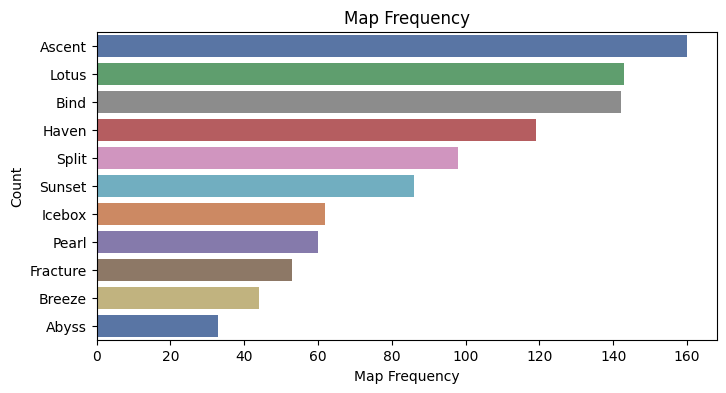

In [11]:
#Identify Most Played Map
plt.figure(figsize=(8,4))
sns.countplot(data=df,y='map',hue='map',order=df['map'].value_counts().index,palette='deep')
plt.xlabel('Map Frequency')
plt.ylabel('Count')
plt.title('Map Frequency')
plt.show()

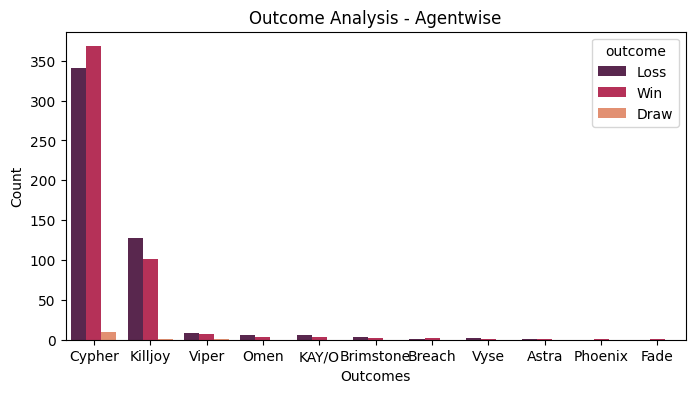

In [12]:
#Agent Outcome Analysis
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='agent',hue='outcome',order=df['agent'].value_counts().index,palette='rocket')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('Outcome Analysis - Agentwise')
plt.show()

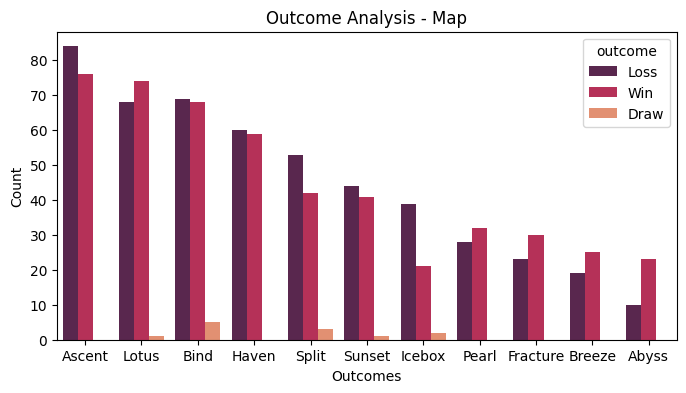

In [13]:
#Map outcome Analysis
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='map',hue='outcome',order=df['map'].value_counts().index,palette='rocket')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('Outcome Analysis - Map')
plt.show()

In [14]:
#Grouby Data For Agent
data_a=df.groupby(['agent'])[['kills','deaths','assists']].sum()
data_a=data_a.reset_index()
data_a = data_a.sort_values(by='kills', ascending=False)
data_a

,agent,kills,deaths,assists
3,Cypher,11184,10194,3480
6,Killjoy,3411,3275,796
9,Viper,241,264,90
7,Omen,140,153,98
5,KAY/O,119,146,78
2,Brimstone,80,74,48
10,Vyse,41,45,15
0,Astra,29,29,13
1,Breach,26,48,26
8,Phoenix,16,7,6


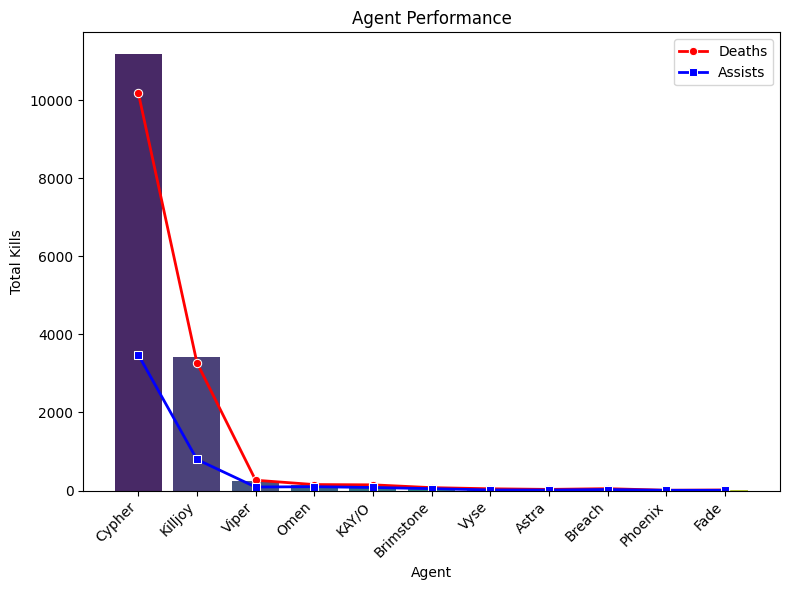

In [15]:
#Agentwise Performace
plt.figure(figsize=(8, 6))
sns.barplot(x='agent', y='kills', data=data_a,hue='agent',palette='viridis')
sns.lineplot(x='agent', y='deaths', data=data_a,color='red',marker='o',label='Deaths',linewidth='2')
sns.lineplot(x='agent', y='assists', data=data_a,marker='s',color='blue',label='Assists',linewidth='2')
plt.xlabel('Agent')
plt.ylabel('Total Kills')
plt.title('Agent Performance')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [16]:
#Groupby Data Mapwise
data_b=df.groupby(['map'])[['kills','deaths','assists']].sum()
data_b=data_b.reset_index()
data_b = data_b.sort_values(by='kills', ascending=False)
data_b

,map,kills,deaths,assists
1,Ascent,2322,2278,806
7,Lotus,2234,1993,662
2,Bind,2218,2055,695
5,Haven,1780,1692,471
9,Split,1545,1450,477
10,Sunset,1332,1228,425
8,Pearl,924,880,291
6,Icebox,897,894,222
4,Fracture,790,763,297
3,Breeze,748,594,168


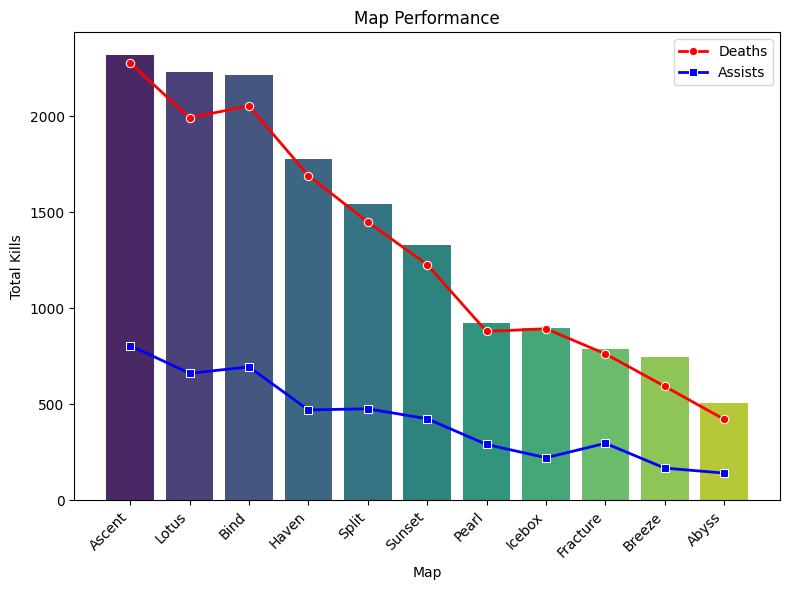

In [17]:
#Mapwise Performace
plt.figure(figsize=(8, 6))
sns.barplot(x='map', y='kills', data=data_b,hue='map',palette='viridis')
sns.lineplot(x='map', y='deaths', data=data_b,color='red',marker='o',label='Deaths',linewidth='2')
sns.lineplot(x='map', y='assists', data=data_b,marker='s',color='blue',label='Assists',linewidth='2')
plt.xlabel('Map')
plt.ylabel('Total Kills')
plt.title('Map Performance')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [18]:
#Identify Ranks
df['rank'].unique()

array(['Placement', 'Silver 2', 'Silver 3', 'Gold 1', 'Gold 2', 'Gold 3',
       'Platinum 1', 'Platinum 2', 'Platinum 3', 'Diamond 1', 'Diamond 2',
       'Diamond 3', 'Ascendant 1', 'Ascendant 2'], dtype=object)

In [19]:
df['rank'].value_counts()

rank
Ascendant 1    179
Diamond 3      153
Diamond 1      126
Platinum 3     111
Gold 3          93
Diamond 2       78
Platinum 1      66
Ascendant 2     57
Platinum 2      48
Placement       24
Gold 2          24
Silver 2        17
Gold 1          17
Silver 3         7
Name: count, dtype: int64

In [20]:
#Grouby Data Rankwise
data_c=df.groupby(['rank'])[['kills','deaths','assists']].sum()
data_c=data_c.reset_index()
data_c = data_c.sort_values(by='kills', ascending=False)
data_c

,rank,kills,deaths,assists
0,Ascendant 1,2618,2488,770
4,Diamond 3,2302,2161,691
2,Diamond 1,1941,1751,538
11,Platinum 3,1727,1601,497
7,Gold 3,1427,1348,476
3,Diamond 2,1278,1111,375
9,Platinum 1,1036,929,305
1,Ascendant 2,847,821,246
10,Platinum 2,819,692,275
6,Gold 2,381,372,121


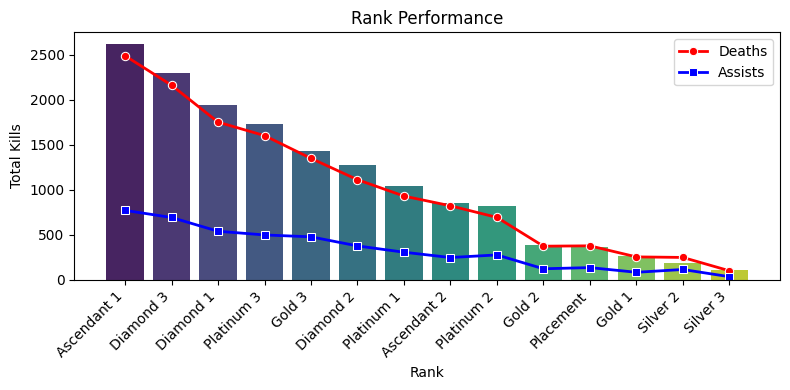

In [21]:
#Rankwise Perforamance
plt.figure(figsize=(8,4))
sns.barplot(data=data_c,x='rank',y='kills',hue='rank',palette='viridis')
sns.lineplot(x='rank', y='deaths', data=data_c,color='red',marker='o',label='Deaths',linewidth='2')
sns.lineplot(x='rank', y='assists', data=data_c,marker='s',color='blue',label='Assists',linewidth='2')
plt.xlabel('Rank')
plt.ylabel('Total Kills')
plt.title('Rank Performance')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [22]:
#Convert date column to Datetime
df['date'] = pd.to_datetime(df['date'])

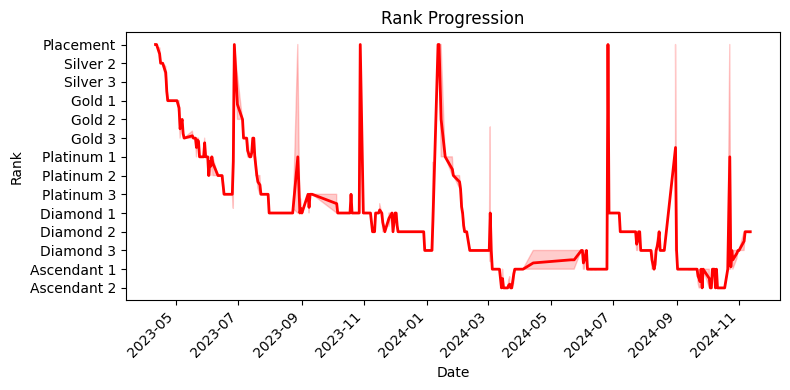

In [23]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='date',y='rank',color='red',linewidth='2')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.title('Rank Progression')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

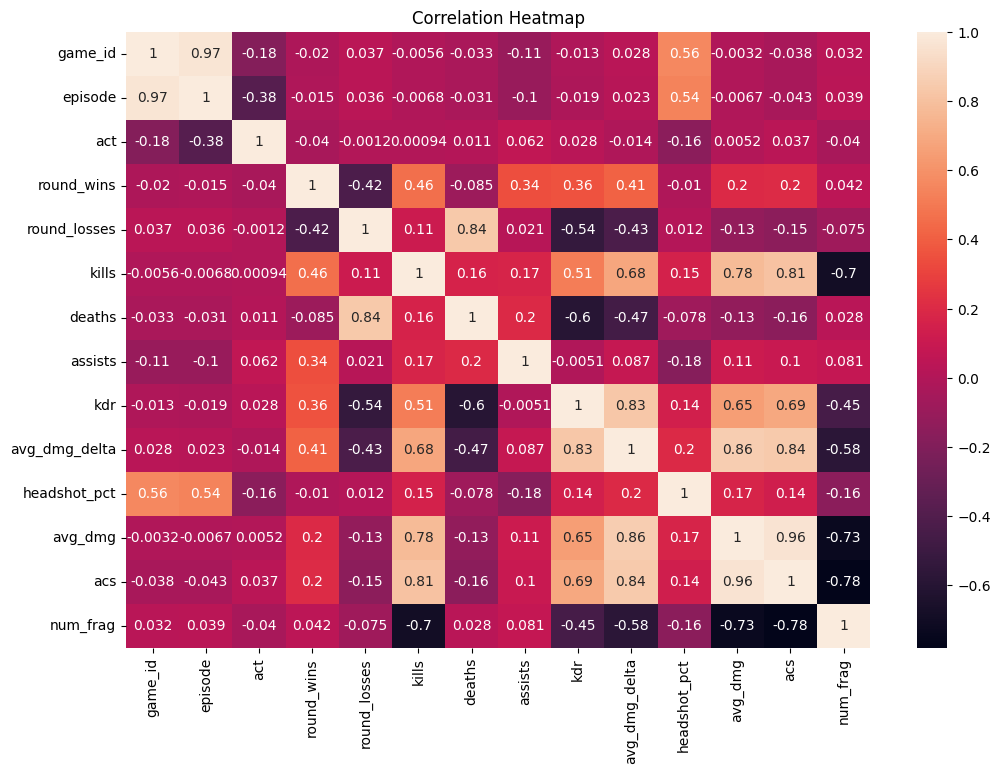

In [24]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot=True,cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
#Data Reference
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,2023-04-11,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,2023-04-12,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,2023-04-15,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,2023-04-15,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,2023-04-15,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


## 3. Machine Learning

In [26]:
#Identify Features
X = df[['rank','agent','map','kills','deaths','assists','kdr','avg_dmg_delta','headshot_pct','avg_dmg','acs','num_frag']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           1000 non-null   object 
 1   agent          1000 non-null   object 
 2   map            1000 non-null   object 
 3   kills          1000 non-null   int64  
 4   deaths         1000 non-null   int64  
 5   assists        1000 non-null   int64  
 6   kdr            1000 non-null   float64
 7   avg_dmg_delta  1000 non-null   int64  
 8   headshot_pct   1000 non-null   int64  
 9   avg_dmg        1000 non-null   int64  
 10  acs            1000 non-null   int64  
 11  num_frag       1000 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 93.9+ KB


In [27]:
#Identify Label
y=df['outcome']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: outcome
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [28]:
#Import Necessary Libraries for Data Enocoding, Machine Learning & Reports
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#ML Libraries
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
categorical_columns = ['rank', 'agent', 'map'] #Categorical Data

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)

In [30]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11960 stored elements and shape (1000, 45)>
  Coords	Values
  (0, 8)	1.0
  (0, 17)	1.0
  (0, 26)	1.0
  (0, 36)	8.0
  (0, 37)	15.0
  (0, 38)	4.0
  (0, 39)	0.5
  (0, 40)	-61.0
  (0, 41)	3.0
  (0, 42)	76.0
  (0, 43)	125.0
  (0, 44)	3.0
  (1, 8)	1.0
  (1, 17)	1.0
  (1, 31)	1.0
  (1, 36)	3.0
  (1, 37)	15.0
  (1, 38)	2.0
  (1, 39)	0.2
  (1, 40)	-124.0
  (1, 41)	22.0
  (1, 42)	42.0
  (1, 43)	59.0
  (1, 44)	5.0
  (2, 8)	1.0
  :	:
  (997, 44)	2.0
  (998, 3)	1.0
  (998, 21)	1.0
  (998, 34)	1.0
  (998, 36)	18.0
  (998, 37)	13.0
  (998, 38)	8.0
  (998, 39)	1.4
  (998, 40)	26.0
  (998, 41)	31.0
  (998, 42)	134.0
  (998, 43)	214.0
  (998, 44)	5.0
  (999, 3)	1.0
  (999, 23)	1.0
  (999, 27)	1.0
  (999, 36)	8.0
  (999, 37)	17.0
  (999, 38)	4.0
  (999, 39)	0.5
  (999, 40)	-71.0
  (999, 41)	18.0
  (999, 42)	87.0
  (999, 43)	130.0
  (999, 44)	4.0


In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
print(y)

[1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 1 2 2 2 2 2 2 0 2 1 1 1 2 1 2 1 1 2
 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 2 2 1
 2 1 0 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 0 2 2 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2
 2 2 1 1 2 1 2 1 2 1 1 1 1 2 2 2 0 2 1 2 1 2 1 1 1 2 2 1 2 1 1 2 2 2 1 2 2
 1 2 2 2 2 1 1 2 1 1 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 1 2
 1 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2
 2 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 2 1 2 2 1 2 1 1 1 1 2 2 2 1 2 1 2 2 2 1
 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 2 1 2
 2 1 2 2 2 1 1 2 2 1 1 0 2 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 2 2 1 2 1 2 1 1 2
 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 2 1 2 1 1 2 1 1 1 2 2 1 2 2 1 2 2
 1 1 1 1 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 1 1 1 2 2 1 1 1 2 2 1 2 0 2 1 1 1 1
 1 2 1 1 2 1 1 2 1 2 2 1 1 2 1 2 2 2 1 1 1 2 1 2 2 1 2 1 2 2 1 2 2 1 1 1 2
 2 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1
 2 2 1 2 2 1 1 1 1 2 2 2 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
# Initialize the model
rf_model=RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, rf_y_pred),'\n')
print(classification_report(y_test, rf_y_pred,zero_division=1))

Accuracy: 0.785 

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.78      0.81      0.80        99
           2       0.79      0.79      0.79        98

    accuracy                           0.79       200
   macro avg       0.86      0.53      0.53       200
weighted avg       0.79      0.79      0.78       200



In [35]:
# Initialize the model
model = XGBClassifier(eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred,zero_division=1))


Accuracy: 0.78 

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.79      0.79      0.79        99
           2       0.77      0.80      0.78        98

    accuracy                           0.78       200
   macro avg       0.85      0.53      0.52       200
weighted avg       0.78      0.78      0.77       200



## 4. Key Obeservations

<div style="padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">

Accuracy:</br>
Both models performed similarly, with RF slightly outperforming XGB (0.785 vs. 0.78).

</br>Precision (Macro Average):</br>
RF has slightly better precision (0.86 vs. 0.85), indicating it assigns more correct positive labels across all classes.

</br>Recall (Macro Average):</br>
Both models have low recall for underrepresented classes (like class 0 with only 3 samples). This suggests both models struggle to identify the minority class effectively.

</br>F1-Score (Macro Average):</br>
RF edges out XGB slightly (0.53 vs. 0.52), but the difference is negligible.

</br>Class 0 Performance:</br>
Both models fail completely on class 0, with a recall of 0.0. This is likely due to the extremely small number of samples (only 3), causing a class imbalance issue.

</br>Weighted Average Metrics:</br>
Weighted averages account for the class distribution. Here, XGB and RF are very similar across metrics, with RF slightly better in precision and F1-score.</div>

<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">

  <h3 style="color: #444555; font-weight: bold;">If you found this notebook helpful, consider giving it an upvote! 👍</h3>
  <p style="font-size: 1.1em; color: #555555;">Your support encourages continued work in this domain. Feel free to leave your thoughts, feedback, or suggestions in the comments section. Let’s collaborate to make data science impactful!</p>

</div>